<a href="https://colab.research.google.com/github/shivanshus/COSINE/blob/master/EEG_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EEG Data Analysis


We will be using the Python MNE library. 

## Importing Data

In [115]:
!pip install mne

In [117]:
# Import the required libraries

import mne
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [118]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
path = '/content/drive/My Drive/raw_eeg_med_1.bdf'
print(path)

/content/drive/My Drive/raw_eeg_med_1.bdf


Now read the .bdf file: 

In [120]:
raw = mne.io.read_raw_bdf(path, preload=True) #reading the data file in the variable 'raw'

print('\n','--- Data Information ---','\n')
raw.info  #to get information about the data 

Extracting EDF parameters from /content/drive/My Drive/raw_eeg_med_1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 696575  =      0.000 ...  2720.996 secs...

 --- Data Information --- 



<Info | 7 non-empty values
 bads: []
 ch_names: A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12, A13, A14, ...
 chs: 79 EEG, 1 STIM
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 52.0 Hz
 meas_date: 2014-04-04 19:40:17 UTC
 nchan: 80
 projs: []
 sfreq: 256.0 Hz
>

Once the Raw file has been created, we can plot the data:

In [121]:
raw.get_data().shape # returns : (num of channels, num of recordings)

(80, 696576)

In [122]:
raw.get_data()

array([[-4.04094566e-03, -4.04088316e-03, -4.04938314e-03, ...,
         1.11120107e-03,  1.11291982e-03,  1.11588856e-03],
       [-1.02229655e-02, -1.02261530e-02, -1.02329342e-02, ...,
        -3.73182123e-03, -3.73219623e-03, -3.72860249e-03],
       [-1.43506766e-02, -1.43499266e-02, -1.43538329e-02, ...,
        -8.82346807e-03, -8.82224932e-03, -8.82315557e-03],
       ...,
       [-4.05300505e+00, -4.05299626e+00, -4.05298210e+00, ...,
        -4.05221844e+00, -4.05222088e+00, -4.05221844e+00],
       [-5.00499994e-01, -5.00499994e-01, -5.00499994e-01, ...,
        -5.00499994e-01, -5.00499994e-01, -5.00499994e-01],
       [ 6.55360000e+04,  6.55360000e+04,  6.55360000e+04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

Effective window size : 8.000 (s)


<ipython-input-123-002a39ff76be>:1: UserWarning: Infinite value in PSD for channels GSR2, Temp.
These channels might be dead.
  raw.plot_psd(tmin=0, tmax=60, fmin=0, fmax=52, average=True, spatial_colors=False);


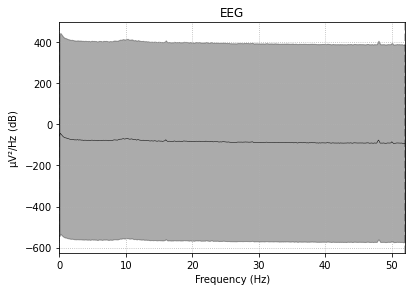

In [123]:
raw.plot_psd(tmin=0, tmax=60, fmin=0, fmax=52, average=True, spatial_colors=False);

In [124]:
raw.filter(l_freq=0, h_freq=30) # only keeping frequencies between 0-30 Hz

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 113 samples (0.441 sec)



<RawEDF | raw_eeg_med_1.bdf, 80 x 696576 (2721.0 s), ~425.3 MB, data loaded>

Effective window size : 8.000 (s)


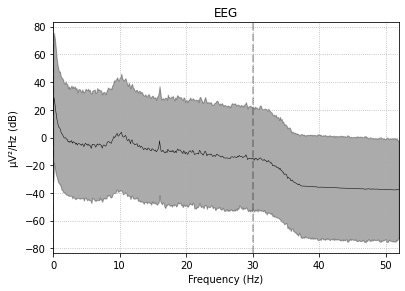

In [125]:
raw.plot_psd(tmin=0, tmax=60, fmin=0, fmax=52, average=True, spatial_colors=False);

Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
87 events found
Event IDs: [  2   4 128]
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
87 events found
Event IDs: [  2   4 128]
Effective window size : 8.000 (s)


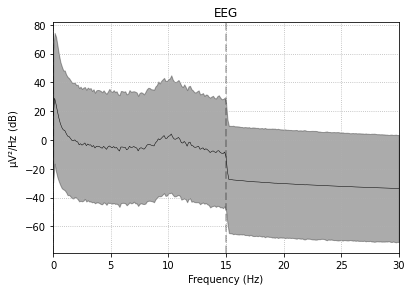

In [129]:
# Downsample a lot
raw.resample(256, npad='auto')
raw.plot_psd(tmin=0, tmax=60, fmin=0, fmax=30, average=True, spatial_colors=False);
# Notice that the max plotted frequency is 60, the nyquist rate!

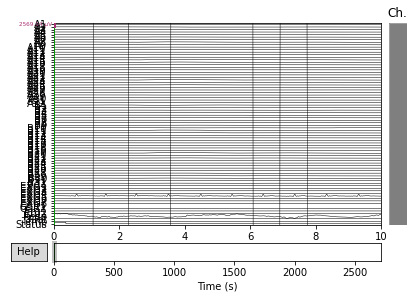

In [130]:
raw.plot(scalings = 'auto',n_channels=80);

In [163]:
dig=raw.info['chs']
dig

[{'cal': 16777215.0,
  'ch_name': 'A1',
  'coil_type': 1 (FIFFV_COIL_EEG),
  'coord_frame': 4 (FIFFV_COORD_HEAD),
  'kind': 2 (FIFFV_EEG_CH),
  'loc': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  'logno': 1,
  'range': 524287.0,
  'scanno': 1,
  'unit': 107 (FIFF_UNIT_V),
  'unit_mul': 0.0},
 {'cal': 16777215.0,
  'ch_name': 'A2',
  'coil_type': 1 (FIFFV_COIL_EEG),
  'coord_frame': 4 (FIFFV_COORD_HEAD),
  'kind': 2 (FIFFV_EEG_CH),
  'loc': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  'logno': 2,
  'range': 524287.0,
  'scanno': 2,
  'unit': 107 (FIFF_UNIT_V),
  'unit_mul': 0.0},
 {'cal': 16777215.0,
  'ch_name': 'A3',
  'coil_type': 1 (FIFFV_COIL_EEG),
  'coord_frame': 4 (FIFFV_COORD_HEAD),
  'kind': 2 (FIFFV_EEG_CH),
  'loc': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  'logno': 3,
  'range': 524287.0,
  'scanno': 3,
  'unit': 107 (FIFF_UNIT_V),
  'unit_mul': 0.0},
 {'cal': 16777215.0,
  'ch_name': 'A4',
  'coil_type': 1 (FIFFV_COIL_EEG),
  'c

In [167]:
dig_loc={}
for dictx in dig:
  loc = dictx.get('loc')
  dig_loc[dictx.get('ch_name')] = loc
print(dig_loc)
print(len(dig_loc))

{'A1': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'A2': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'A3': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'A4': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'A5': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'A6': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'A7': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'A8': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'A9': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'A10': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'A11': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'A12': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'A13': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'A14': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'A15': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'A16': array([0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
montage = mne.channels.read_dig_montage(point_names=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 'Plet', 'Temp','Status'], dig_ch_pos=dig_loc)
raw.rename_channels(mapping= lambda name: name.replace(".",""))
raw.set_montage(montage)

In [148]:
from mne.preprocessing import ICA
num_components = 15 #play around with this number to get components that seem to represent the actual brain activations well
ica = ICA(n_components=num_components, method='fastica')
ica.fit(raw)

Fitting ICA to data using 79 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 15 components


/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Fitting ICA took 97.7s.


<ICA  |  raw data decomposition, fit (fastica): 696576 samples, 15 components, channels used: "eeg">

In [172]:
#Welch like Analysis

mne.time_frequency.psd_welch(raw, fmin=0, fmax=30, tmin=None, tmax=None, n_fft=256, n_overlap=0, n_per_seg=None, picks=None, proj=False, n_jobs=1, reject_by_annotation=True, average='mean')

Effective window size : 1.000 (s)


(array([[9.63175045e-12, 1.21354084e-10, 1.79313490e-11, ...,
         3.24227855e-15, 3.03060607e-15, 2.83993128e-15],
        [1.37780584e-11, 1.63039698e-10, 2.22532880e-11, ...,
         4.04838432e-15, 3.78503732e-15, 3.54768008e-15],
        [5.38319197e-12, 5.25771385e-11, 1.04858650e-11, ...,
         1.20631760e-15, 1.12525204e-15, 1.05255251e-15],
        ...,
        [1.46898478e-08, 1.81291357e-07, 2.62314378e-08, ...,
         4.54173022e-12, 4.24938533e-12, 3.98545564e-12],
        [3.52746465e-14, 2.66459195e-13, 3.27297028e-13, ...,
         9.54933406e-18, 8.72921483e-18, 8.01926768e-18],
        [6.08972208e-36, 1.04279736e-35, 4.69609895e-36, ...,
         2.22876759e-36, 2.90667150e-36, 2.72483701e-36]]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30.]))

In [178]:
#Morlet wavelet decomposition

mne.time_frequency.morlet(sfreq=256, freqs= (1,30), n_cycles=3, sigma=None, zero_mean=False)

[array([-2.72850312e-07-2.35362298e-07j, -2.78127938e-07-2.52080469e-07j,
        -2.83177679e-07-2.69607563e-07j, ...,
        -2.83177679e-07+2.69607563e-07j, -2.78127938e-07+2.52080469e-07j,
        -2.72850312e-07+2.35362298e-07j]),
 array([-1.71245301e-06-2.56286705e-06j,  1.46403346e-06-9.86971187e-06j,
         2.35074457e-05-1.92920621e-05j,  8.71614485e-05+4.28196739e-06j,
         1.66724376e-04+1.66724376e-04j,  2.94316223e-05+5.99094434e-04j,
        -9.11423754e-04+1.11057306e-03j, -3.20491866e-03+4.75404774e-04j,
        -5.72017690e-03-3.82210001e-03j, -3.34189038e-03-1.33415743e-02j,
         1.22040677e-02-2.28322047e-02j,  4.32009980e-02-1.54575643e-02j,
         7.07362417e-02+2.92999107e-02j,  5.14316713e-02+1.08743132e-01j,
        -5.16550745e-02+1.70283960e-01j, -2.12582503e-01+1.27417049e-01j,
        -3.18770930e-01-6.34074803e-02j, -2.39054776e-01-3.22328052e-01j,
         4.57273813e-02-4.64277894e-01j,  3.78360899e-01-3.42926330e-01j,
         5.26256510e-01

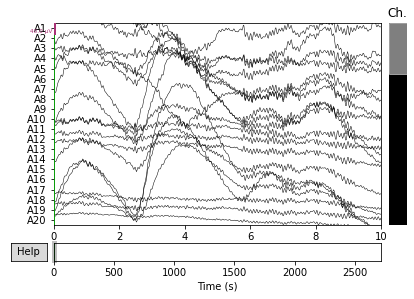

In [179]:
raw.plot();